<a href="https://colab.research.google.com/github/TheRoberto2512/DeepBrainMRI/blob/main/Analisi_dei_risultati.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font size=6>**SOMMARIO DEL NOTEBOOK**</font>

In questo notebook si analizzano le evaluation per trarre le conclusioni finali. Tutti i valori nei grafici sono relativi agli F1 Score.

**Indice:**
*   [Installazione e import librerie](#1)
*   [Elementi di configurazione principali](#2)
*   [Modello Dense](#3)
*   [Modello Convolutivo](#4)
*   [Modello EfficientNetV2S](#5)
*   [Confronto finale tra tutti i modelli](#6)



<a name="1"></a>
# Installazioni e import librerie

In [ ]:
! pip install tensorflow-gpu==2.8.3

In [ ]:
from google.colab import drive, files
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import shutil
import os

In [ ]:
drive.mount("/content/drive", force_remount=True) # montiamo Google Drive per poter salvare i dataset pre-processati

Qualora la cartella principale del progetto non si trovi nella home di Google Drive, personalizzare la seguente stringa:

In [ ]:
main_folder_path = '/content/drive/MyDrive/DeepBrainMRI'

Le seguenti funzioni servono per caricare facilmente le history e le evaluation dei modelli da Google Drive.

In [ ]:
result_folder_path = f"{main_folder_path}/Risultati vari"
dataset_directory = ''

def loadHistory(nomeFile):                                                        # funzione per caricare la history di un addestramento
  if os.path.exists(result_folder_path):
    return pd.read_csv(f"{result_folder_path}/{nomeFile}").to_dict()
  else:
    raise Exception("Cartella inesistente!")

def loadEvaluation(nomeFile):                                                     # funzione per caricare il risultato di un evaluation
  if os.path.exists(result_folder_path):
    return pd.read_csv(f"{result_folder_path}/{nomeFile}").to_dict()
  else:
    raise Exception("Cartella inesistente!")

In [ ]:
def plotta(history, colore, name):
  acc, val_acc, loss, val_loss = [], [], [], []
  for i in range(0, len(history['accuracy'])):
    acc.append(history['accuracy'][i])
    val_acc.append(history['val_accuracy'][i])
    loss.append(history['loss'][i])
    val_loss.append(history['val_loss'][i])

  epochs = range(1, len(acc)+1)

  f1_score, val_f1_score = [], []

  for i in range(len(acc)):
    f1_score.append(np.mean([float(x) for x in history['f1_score'][i].replace('[', '').replace(']', '').split()]))
    val_f1_score.append(np.mean([float(x) for x in history['val_f1_score'][i].replace('[', '').replace(']', '').split()]))

  plt.plot(epochs, val_f1_score, color=colore, label=name)

def mediaF1Score(eva):
  return np.mean(list(eva['f1_score'].values()))

<a name="2"></a>
# Confronti sugli elementi di configurazione

## Categorical Cross Entropy VS Kullback Leibler Divergence

Con questo test si dimostra che, nonostante il funzionamento della Categorical Cross Entropy e della Kullback Leibler Divergence sia molto simile quando si utilizzano vettori one-hot encoding, la Kullback offre delle prestazioni leggermente superiori.

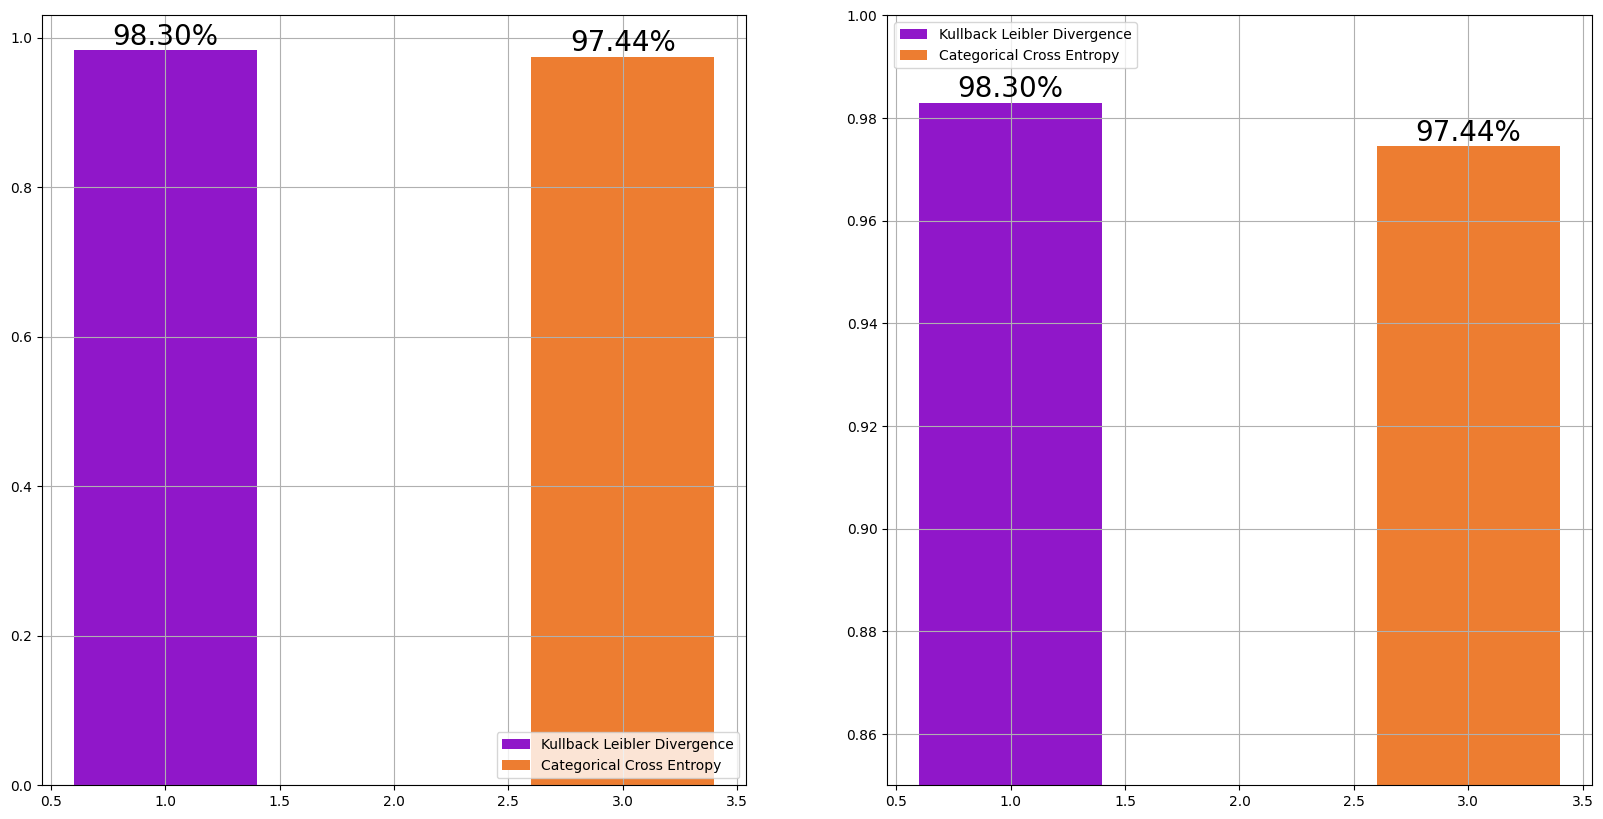

In [ ]:
#@title Indicare i percorsi dei salvataggi per stampare il grafico

percorsoKLD = "" #@param {type:"string"}
percorsoCat = "" #@param {type:"string"}

KLD = loadHistory(percorsoKLD)
Cat = loadHistory(percorsoCat)

plt.figure(figsize=(20, 10))

plt.subplot(1,2,1)
plt.bar(1, mediaF1Score(KLD), color='#9017c9', label="Kullback Leibler Divergence")
plt.text(1, mediaF1Score(KLD), f"{mediaF1Score(KLD)*100:.2f}%", ha='center', va='bottom', fontsize=20)
plt.bar(3, mediaF1Score(Cat), color='#ed7d31', label="Categorical Cross Entropy")
plt.text(3, mediaF1Score(Cat), f"{mediaF1Score(Cat)*100:.2f}%", ha='center', va='bottom', fontsize=20)
plt.ylim([0, 1.03])

plt.grid()
plt.legend(loc="lower right")

plt.subplot(1,2,2)
plt.bar(1, mediaF1Score(KLD), color='#9017c9', label="Kullback Leibler Divergence")
plt.text(1, mediaF1Score(KLD), f"{mediaF1Score(KLD)*100:.2f}%", ha='center', va='bottom', fontsize=20)
plt.bar(3, mediaF1Score(Cat), color='#ed7d31', label="Categorical Cross Entropy")
plt.text(3, mediaF1Score(Cat), f"{mediaF1Score(Cat)*100:.2f}%", ha='center', va='bottom', fontsize=20)
plt.ylim([0.85, 1])

plt.grid()
plt.legend(loc="upper left")

plt.show()

<a name="3"></a>
# Modello Dense

Nonostante non sia adatto alla classificazione delle immagini, il modello dense raggiunge comunque un punteggio f1 score quasi pari al 90%.

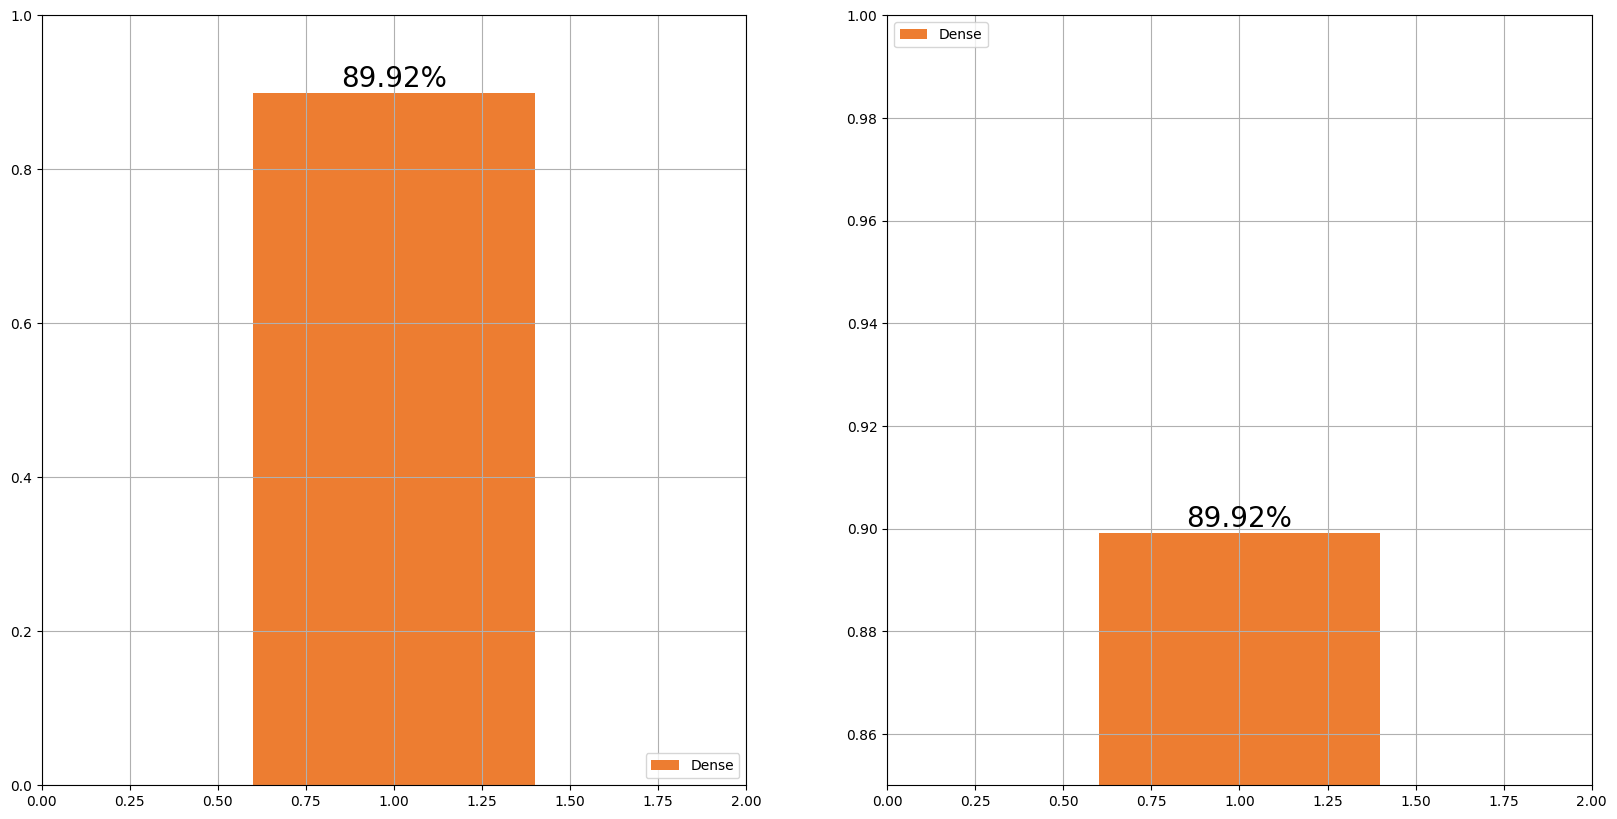

In [ ]:
#@title Indicare i percorsi dei salvataggi per stampare il grafico

percorsoDense = "" #@param {type:"string"}

Dense = loadHistory(percorsoDense)

plt.figure(figsize=(20, 10))

plt.subplot(1,2,1)
plt.bar(1, mediaF1Score(Dense), color='#ed7d31', label="Dense")
plt.text(1, mediaF1Score(Dense), f"{mediaF1Score(Dense)*100:.2f}%", ha='center', va='bottom', fontsize=20)
plt.bar(3, 0)
plt.ylim([0, 1])
plt.xlim([0, 2])

plt.grid()
plt.legend(loc="lower right")

plt.subplot(1,2,2)
plt.bar(1, mediaF1Score(Dense), color='#ed7d31', label="Dense")
plt.text(1, mediaF1Score(Dense), f"{mediaF1Score(Dense)*100:.2f}%", ha='center', va='bottom', fontsize=20)
plt.bar(3, 0)
plt.ylim([0.85, 1])
plt.xlim([0, 2])

plt.grid()
plt.legend(loc="upper left")

plt.show()

<a name="3"></a>
# Modello Convolutivo

Si testano le prestazioni raggiunte dal modello al variare del dataset:

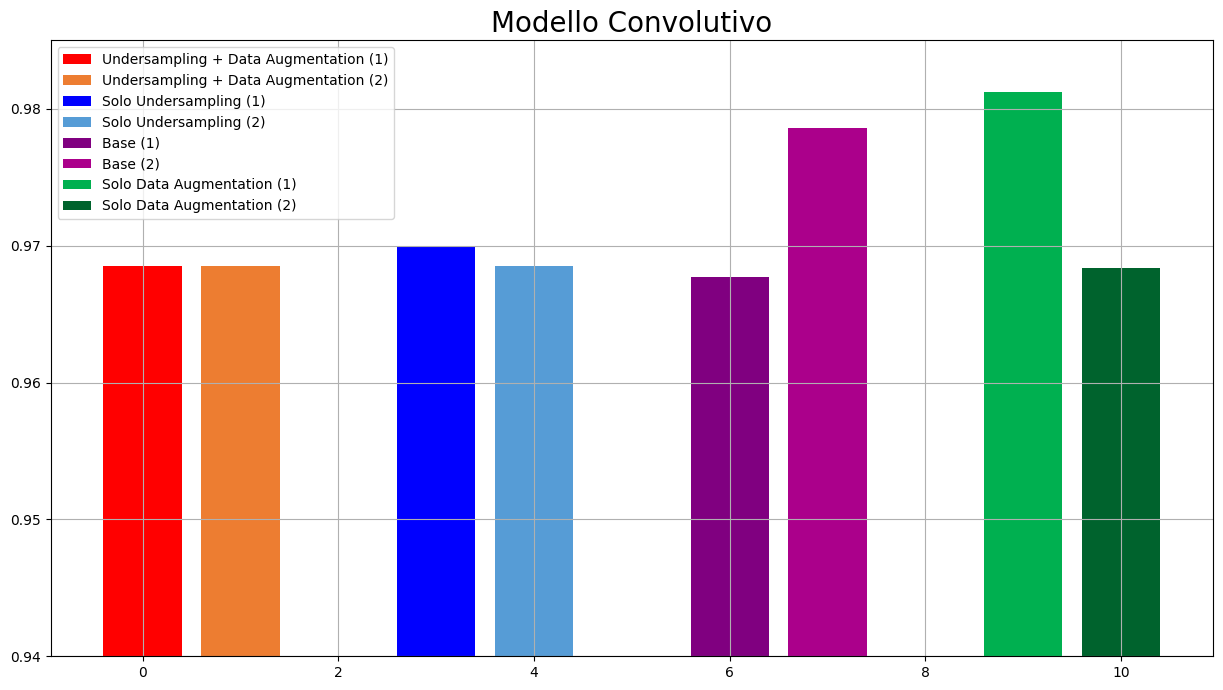

In [ ]:
#@title Indicare i percorsi dei salvataggi per stampare il grafico
Convolutivo_under_aug_1 = "" #@param {type:"string"}
Convolutivo_under_aug_2 = "" #@param {type:"string"}

Convolutivo_only_under_1 = "" #@param {type:"string"}
Convolutivo_only_under_2 = "" #@param {type:"string"}

Convolutivo_base_1 = "" #@param {type:"string"}
Convolutivo_base_2 = "" #@param {type:"string"}

Convolutivo_only_aug_1 = "" #@param {type:"string"}
Convolutivo_only_aug_2 = "" #@param {type:"string"}

E_under_aug_2 = loadEvaluation(Convolutivo_under_aug_1)
E_under_aug_1 = loadEvaluation(Convolutivo_under_aug_1)

E_only_under_2 = loadEvaluation(Convolutivo_only_under_1)
E_only_under_1 = loadEvaluation(Convolutivo_only_under_2)

E_base_1 = loadEvaluation(Convolutivo_base_1)
E_base_2 = loadEvaluation(Convolutivo_base_2)

E_only_aug_2 = loadEvaluation(Convolutivo_only_aug_1)
E_only_aug_1 = loadEvaluation(Convolutivo_only_aug_2)

plt.figure(figsize=(15, 8))

plt.bar(0, mediaF1Score(E_under_aug_2), color='red', label="Undersampling + Data Augmentation (1)")
plt.bar(1, mediaF1Score(E_under_aug_1), color='#ed7d31', label="Undersampling + Data Augmentation (2)")

plt.bar(3, mediaF1Score(E_only_under_1), color='blue', label="Solo Undersampling (1)")
plt.bar(4, mediaF1Score(E_only_under_2), color='#569cd6', label="Solo Undersampling (2)")

plt.bar(6, mediaF1Score(E_base_1), color='purple', label="Base (1)")
plt.bar(7, mediaF1Score(E_base_2), color='#ab008b', label="Base (2)")

plt.bar(9, mediaF1Score(E_only_aug_1), color='#00b050', label="Solo Data Augmentation (1)")
plt.bar(10, mediaF1Score(E_only_aug_2), color='#00632d', label="Solo Data Augmentation (2)")

plt.ylim([0.94, 0.985])

plt.title("Modello Convolutivo", fontsize=20)

plt.legend(loc="upper left")
plt.grid()
plt.show()

## Dense VS Convolutivo

È possibile apprezzare graficamente la differenza, in termini di performance, tra il modello Dense e il modello Convolutivo.

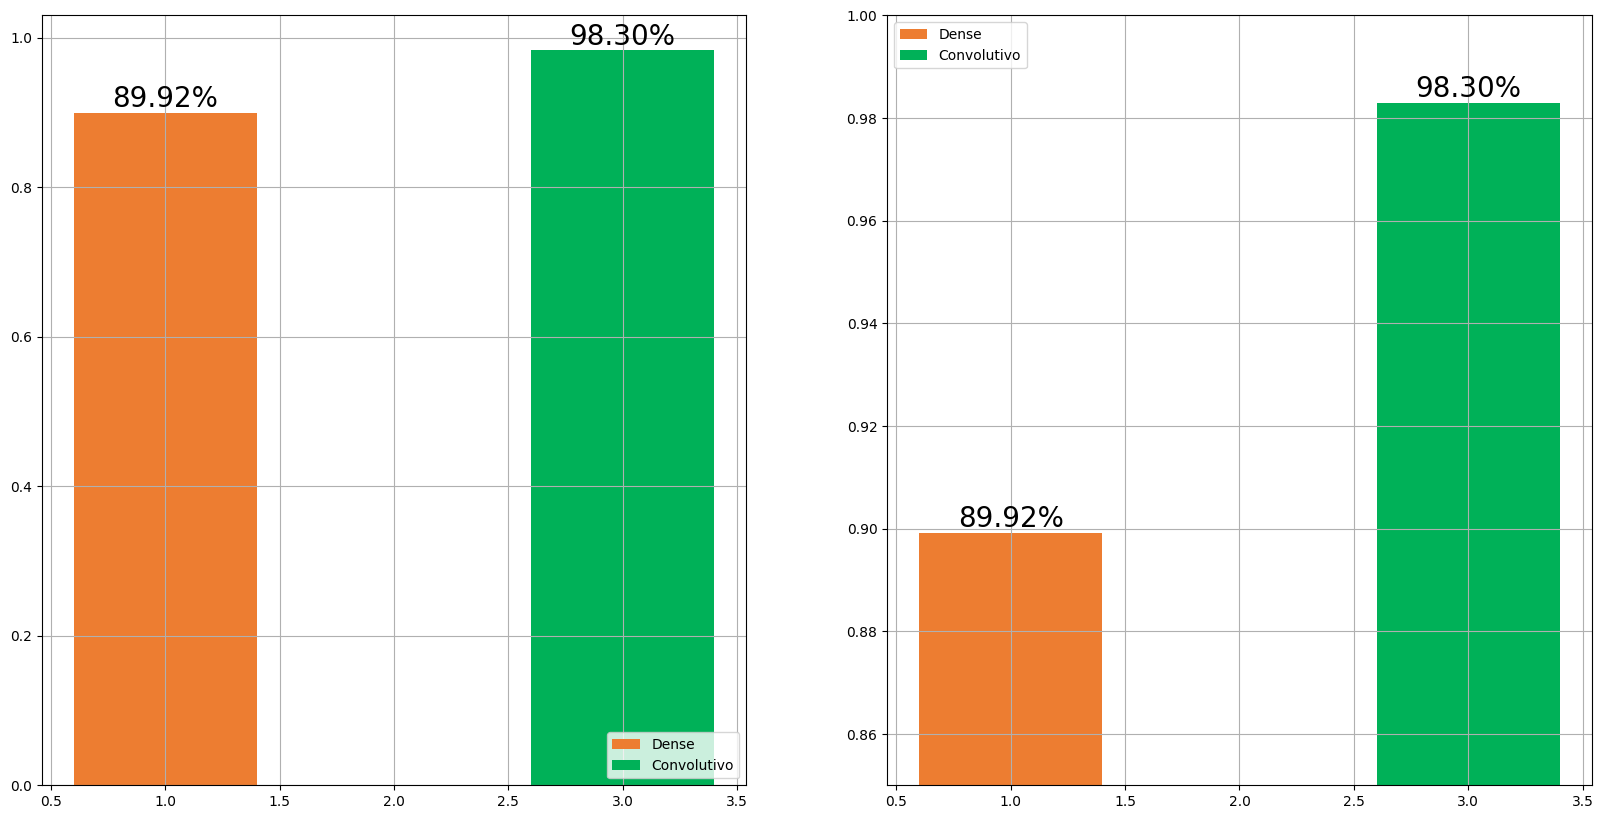

In [ ]:
#@title Indicare i percorsi dei salvataggi per stampare il grafico

percorsoDense = "" #@param {type:"string"}
percorsoConvolutivo = "" #@param {type:"string"}

Dense       = loadHistory(percorsoDense)
Convolutivo = loadHistory(percorsoConvolutivo)

plt.figure(figsize=(20, 10))

plt.subplot(1,2,1)
plt.bar(1, mediaF1Score(Dense), color='#ed7d31', label="Dense")
plt.text(1, mediaF1Score(Dense), f"{mediaF1Score(Dense)*100:.2f}%", ha='center', va='bottom', fontsize=20)
plt.bar(3, mediaF1Score(Convolutivo), color='#00b158', label="Convolutivo")
plt.text(3, mediaF1Score(Convolutivo), f"{mediaF1Score(Convolutivo)*100:.2f}%", ha='center', va='bottom', fontsize=20)
plt.ylim([0, 1.03])

plt.grid()
plt.legend(loc="lower right")

plt.subplot(1,2,2)
plt.bar(1, mediaF1Score(Dense), color='#ed7d31', label="Dense")
plt.text(1, mediaF1Score(Dense), f"{mediaF1Score(Dense)*100:.2f}%", ha='center', va='bottom', fontsize=20)
plt.bar(3, mediaF1Score(Convolutivo), color='#00b158', label="Convolutivo")
plt.text(3, mediaF1Score(Convolutivo), f"{mediaF1Score(Convolutivo)*100:.2f}%", ha='center', va='bottom', fontsize=20)
plt.ylim([0.85, 1])

plt.grid()
plt.legend(loc="upper left")

plt.show()

<a name="4"></a>
# EfficientNetV2S

Si testano le prestazioni raggiunte dal modello al variare del dataset:

## Base

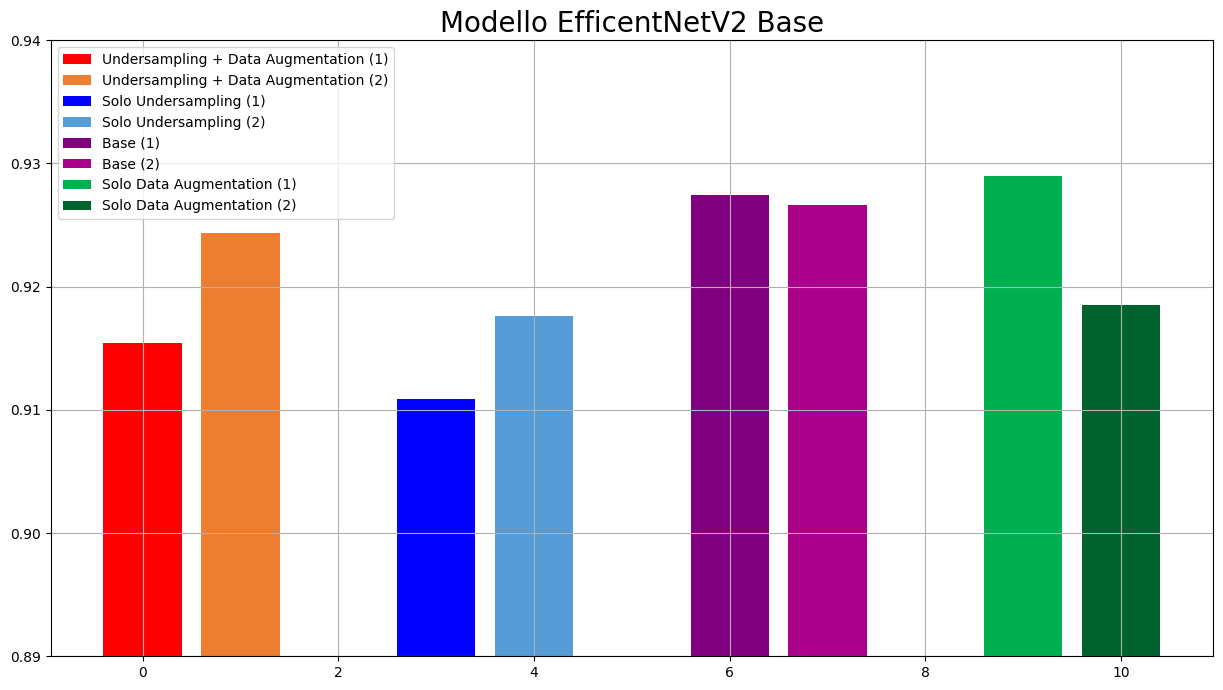

In [ ]:
#@title Indicare i percorsi dei salvataggi per stampare il grafico
EfficentBase_under_aug_1 = "" #@param {type:"string"}
EfficentBase_under_aug_2 = "" #@param {type:"string"}

EfficentBase_only_under_1 = "" #@param {type:"string"}
EfficentBase_only_under_2 = "" #@param {type:"string"}

EfficentBase_base_1 = "" #@param {type:"string"}
EfficentBase_base_2 = "" #@param {type:"string"}

EfficentBase_only_aug_1 = "" #@param {type:"string"}
EfficentBase_only_aug_2 = "" #@param {type:"string"}

E_under_aug_2 = loadEvaluation(EfficentBase_under_aug_1)
E_under_aug_1 = loadEvaluation(EfficentBase_under_aug_2)

E_only_under_2 = loadEvaluation(EfficentBase_only_under_2)
E_only_under_1 = loadEvaluation(EfficentBase_only_under_1)

E_base_1 = loadEvaluation(EfficentBase_base_1)
E_base_2 = loadEvaluation(EfficentBase_base_2)

E_only_aug_2 = loadEvaluation(EfficentBase_only_aug_1)
E_only_aug_1 = loadEvaluation(EfficentBase_only_aug_2)

plt.figure(figsize=(15, 8))

plt.bar(0, mediaF1Score(E_under_aug_2), color='red', label="Undersampling + Data Augmentation (1)")
plt.bar(1, mediaF1Score(E_under_aug_1), color='#ed7d31', label="Undersampling + Data Augmentation (2)")

plt.bar(3, mediaF1Score(E_only_under_1), color='blue', label="Solo Undersampling (1)")
plt.bar(4, mediaF1Score(E_only_under_2), color='#569cd6', label="Solo Undersampling (2)")

plt.bar(6, mediaF1Score(E_base_1), color='purple', label="Base (1)")
plt.bar(7, mediaF1Score(E_base_2), color='#ab008b', label="Base (2)")

plt.bar(9, mediaF1Score(E_only_aug_1), color='#00b050', label="Solo Data Augmentation (1)")
plt.bar(10, mediaF1Score(E_only_aug_2), color='#00632d', label="Solo Data Augmentation (2)")

plt.ylim([0.89, 0.94])

plt.title("Modello EfficentNetV2 Base", fontsize=20)

plt.legend(loc="upper left")
plt.grid()
plt.show()

### Dense VS Convolutivo VS EfficentNetV2S Base

Si verificano le performance ottenute dal modello EfficientNetV2S confrontandolo col modello Dense e il modello Convolutivo.

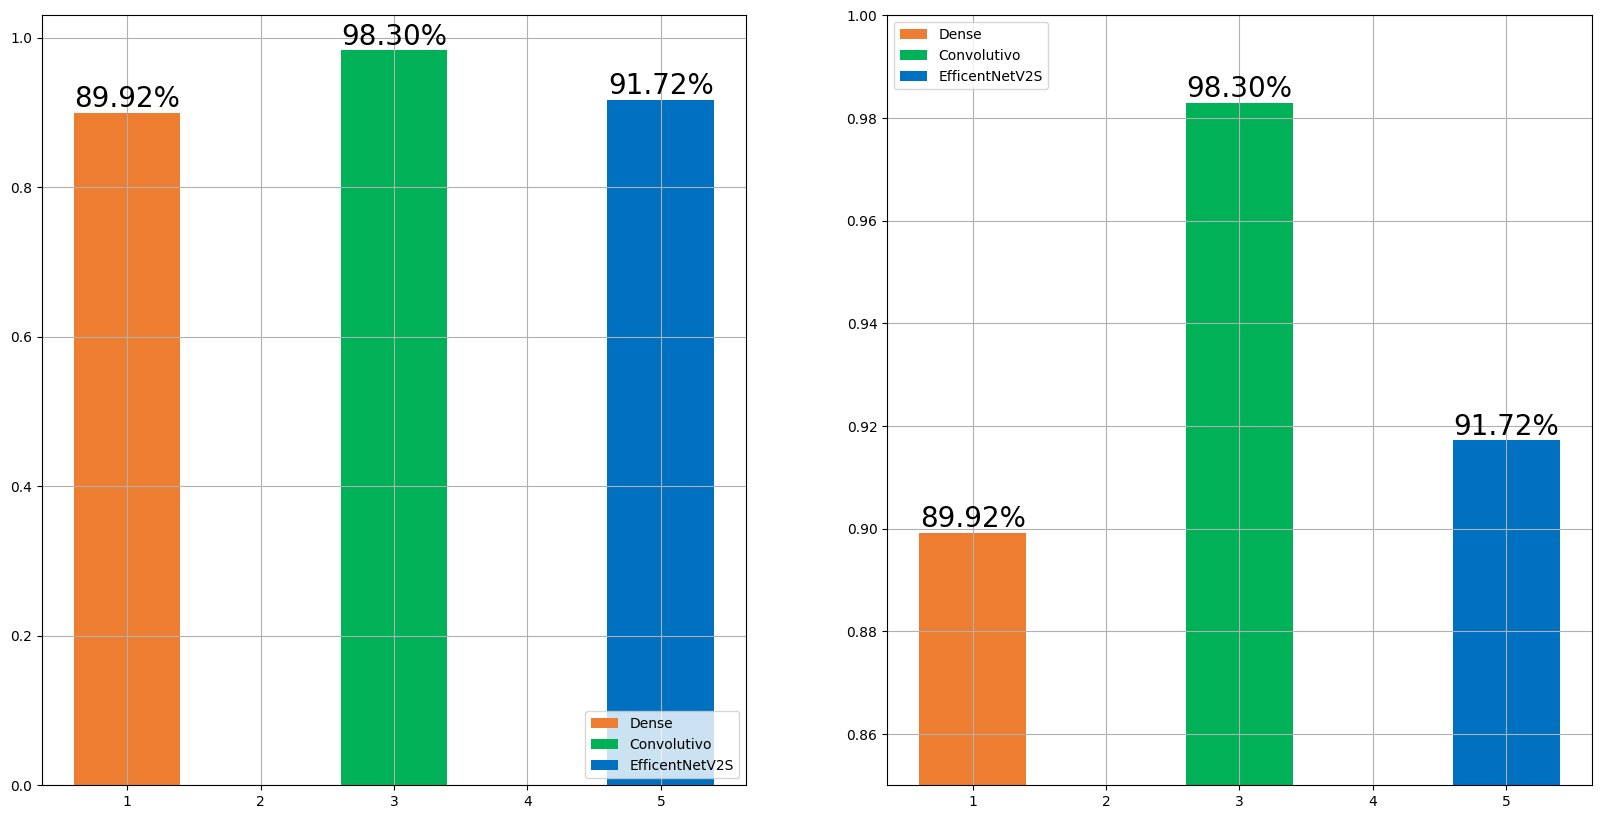

In [ ]:
#@title Indicare i percorsi dei salvataggi per stampare il grafico

percorsoDense = "" #@param {type:"string"}
percorsoConvolutivo = "" #@param {type:"string"}
percorsoEfficent = "" #@param {type:"string"}

Dense       = loadHistory(percorsoDense)
Convolutivo = loadHistory(percorsoConvolutivo)
Efficent    = loadHistory(percorsoEfficent)

plt.figure(figsize=(20, 10))

plt.subplot(1,2,1)
plt.bar(1, mediaF1Score(Dense), color='#ed7d31', label="Dense")
plt.text(1, mediaF1Score(Dense), f"{mediaF1Score(Dense)*100:.2f}%", ha='center', va='bottom', fontsize=20)
plt.bar(3, mediaF1Score(Convolutivo), color='#00b158', label="Convolutivo")
plt.text(3, mediaF1Score(Convolutivo), f"{mediaF1Score(Convolutivo)*100:.2f}%", ha='center', va='bottom', fontsize=20)
plt.bar(5, mediaF1Score(Efficent), color='#0070c0', label="EfficentNetV2S")
plt.text(5, mediaF1Score(Efficent), f"{mediaF1Score(Efficent)*100:.2f}%", ha='center', va='bottom', fontsize=20)
plt.ylim([0, 1.03])

plt.grid()
plt.legend(loc="lower right")

plt.subplot(1,2,2)
plt.bar(1, mediaF1Score(Dense), color='#ed7d31', label="Dense")
plt.text(1, mediaF1Score(Dense), f"{mediaF1Score(Dense)*100:.2f}%", ha='center', va='bottom', fontsize=20)
plt.bar(3, mediaF1Score(Convolutivo), color='#00b158', label="Convolutivo")
plt.text(3, mediaF1Score(Convolutivo), f"{mediaF1Score(Convolutivo)*100:.2f}%", ha='center', va='bottom', fontsize=20)
plt.bar(5, mediaF1Score(Efficent), color='#0070c0', label="EfficentNetV2S")
plt.text(5, mediaF1Score(Efficent), f"{mediaF1Score(Efficent)*100:.2f}%", ha='center', va='bottom', fontsize=20)
plt.ylim([0.85, 1])

plt.grid()
plt.legend(loc="upper left")

plt.show()

## Fine Tuning

Si testano le prestazioni raggiunte dal modello al variare del dataset:

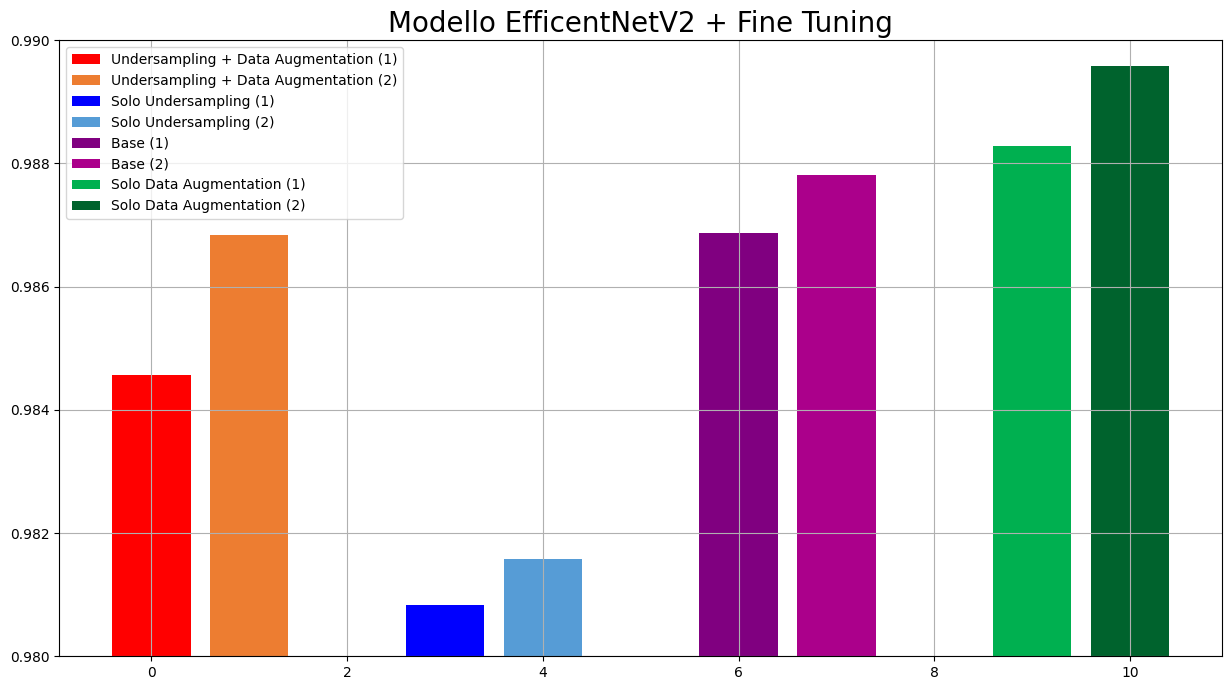

In [ ]:
#@title Indicare i percorsi dei salvataggi per stampare il grafico

EfficentFT_under_aug_1 = "" #@param {type:"string"}
EfficentFT_under_aug_2 = "" #@param {type:"string"}

EfficentFT_only_under_1 = "" #@param {type:"string"}
EfficentFT_only_under_2 = "" #@param {type:"string"}

EfficentFT_base_1 = "" #@param {type:"string"}
EfficentFT_base_2 = "" #@param {type:"string"}

EfficentFT_only_aug_1 = "" #@param {type:"string"}
EfficentFT_only_aug_2 = "" #@param {type:"string"}

# import delle evaluation
E_FT_under_aug_2 = loadEvaluation(EfficentFT_under_aug_1)
E_FT_under_aug_1 = loadEvaluation(EfficentFT_under_aug_2)

E_FT_only_under_2 = loadEvaluation(EfficentFT_only_under_2)
E_FT_only_under_1 = loadEvaluation(EfficentFT_only_under_1)

E_FT_base_1 = loadEvaluation(EfficentFT_base_1)
E_FT_base_2 = loadEvaluation(EfficentFT_base_2)

E_FT_only_aug_2 = loadEvaluation(EfficentFT_only_aug_2)
E_FT_only_aug_1 = loadEvaluation(EfficentFT_only_aug_1)

# plot
plt.figure(figsize=(15, 8))

plt.bar(0, mediaF1Score(E_FT_under_aug_2), color='red', label="Undersampling + Data Augmentation (1)")
plt.bar(1, mediaF1Score(E_FT_under_aug_1), color='#ed7d31', label="Undersampling + Data Augmentation (2)")

plt.bar(3, mediaF1Score(E_FT_only_under_1), color='blue', label="Solo Undersampling (1)")
plt.bar(4, mediaF1Score(E_FT_only_under_2), color='#569cd6', label="Solo Undersampling (2)")

plt.bar(6, mediaF1Score(E_FT_base_1), color='purple', label="Base (1)")
plt.bar(7, mediaF1Score(E_FT_base_2), color='#ab008b', label="Base (2)")

plt.bar(9, mediaF1Score(E_FT_only_aug_1), color='#00b050', label="Solo Data Augmentation (1)")
plt.bar(10, mediaF1Score(E_FT_only_aug_2), color='#00632d', label="Solo Data Augmentation (2)")

plt.ylim([0.98, 0.99])

plt.title("Modello EfficentNetV2 + Fine Tuning", fontsize=20)

plt.legend()
plt.grid()
plt.show()

## EfficientNetV2S Base VS EfficientNetV2S + Fine Tuning  

È possibile osservare che il fine tuning ha portato ad un incremento delle performance di circa l'8%.

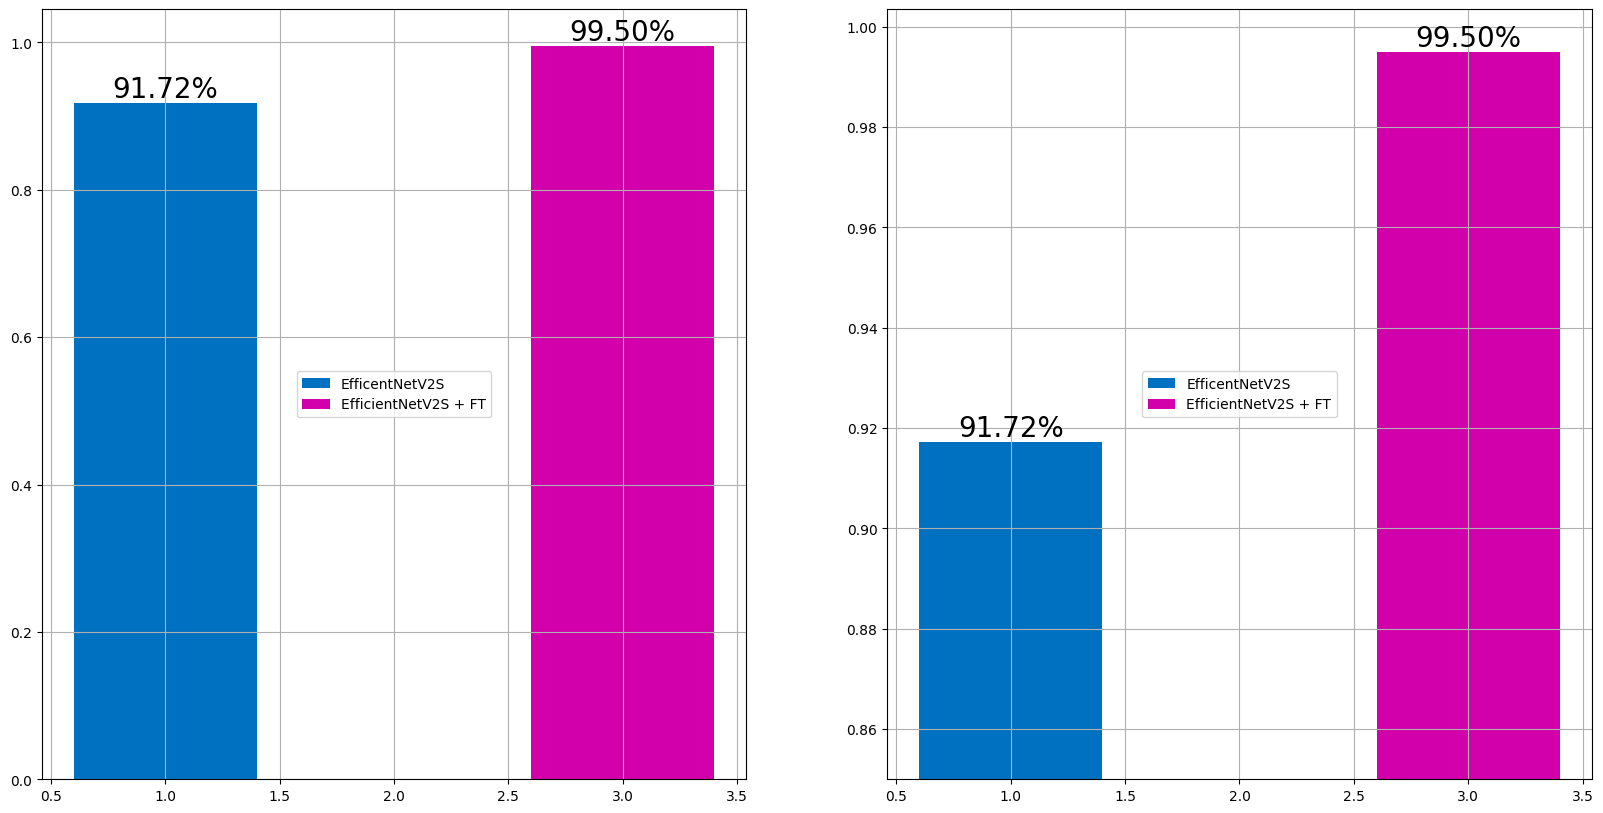

In [ ]:
#@title Indicare i percorsi dei salvataggi per stampare il grafico

percorsoEfficent = "" #@param {type:"string"}
percorsoEfficentFT = "" #@param {type:"string"}

Efficent    = loadHistory(percorsoEfficent)
EfficentFT  = loadHistory(percorsoEfficentFT)

plt.figure(figsize=(20, 10))

plt.subplot(1,2,1)
plt.bar(1, mediaF1Score(Efficent), color='#0070c0', label="EfficentNetV2S")
plt.text(1, mediaF1Score(Efficent), f"{mediaF1Score(Efficent)*100:.2f}%", ha='center', va='bottom', fontsize=20)
plt.bar(3, mediaF1Score(EfficentFT), color='#d100aa', label="EfficientNetV2S + FT")
plt.text(3, mediaF1Score(EfficentFT), f"{mediaF1Score(EfficentFT)*100:.2f}%", ha='center', va='bottom', fontsize=20)
plt.ylim([0, 1.045])

plt.grid()
plt.legend(loc="center")

plt.subplot(1,2,2)
plt.bar(1, mediaF1Score(Efficent), color='#0070c0', label="EfficentNetV2S")
plt.text(1, mediaF1Score(Efficent), f"{mediaF1Score(Efficent)*100:.2f}%", ha='center', va='bottom', fontsize=20)
plt.bar(3, mediaF1Score(EfficentFT), color='#d100aa', label="EfficientNetV2S + FT")
plt.text(3, mediaF1Score(EfficentFT), f"{mediaF1Score(EfficentFT)*100:.2f}%", ha='center', va='bottom', fontsize=20)
plt.ylim([0.85, 1.0035])

plt.grid()
plt.legend(loc="center")

plt.show()

<a name="6"></a>
# Confronto Finale tra tutti i modelli

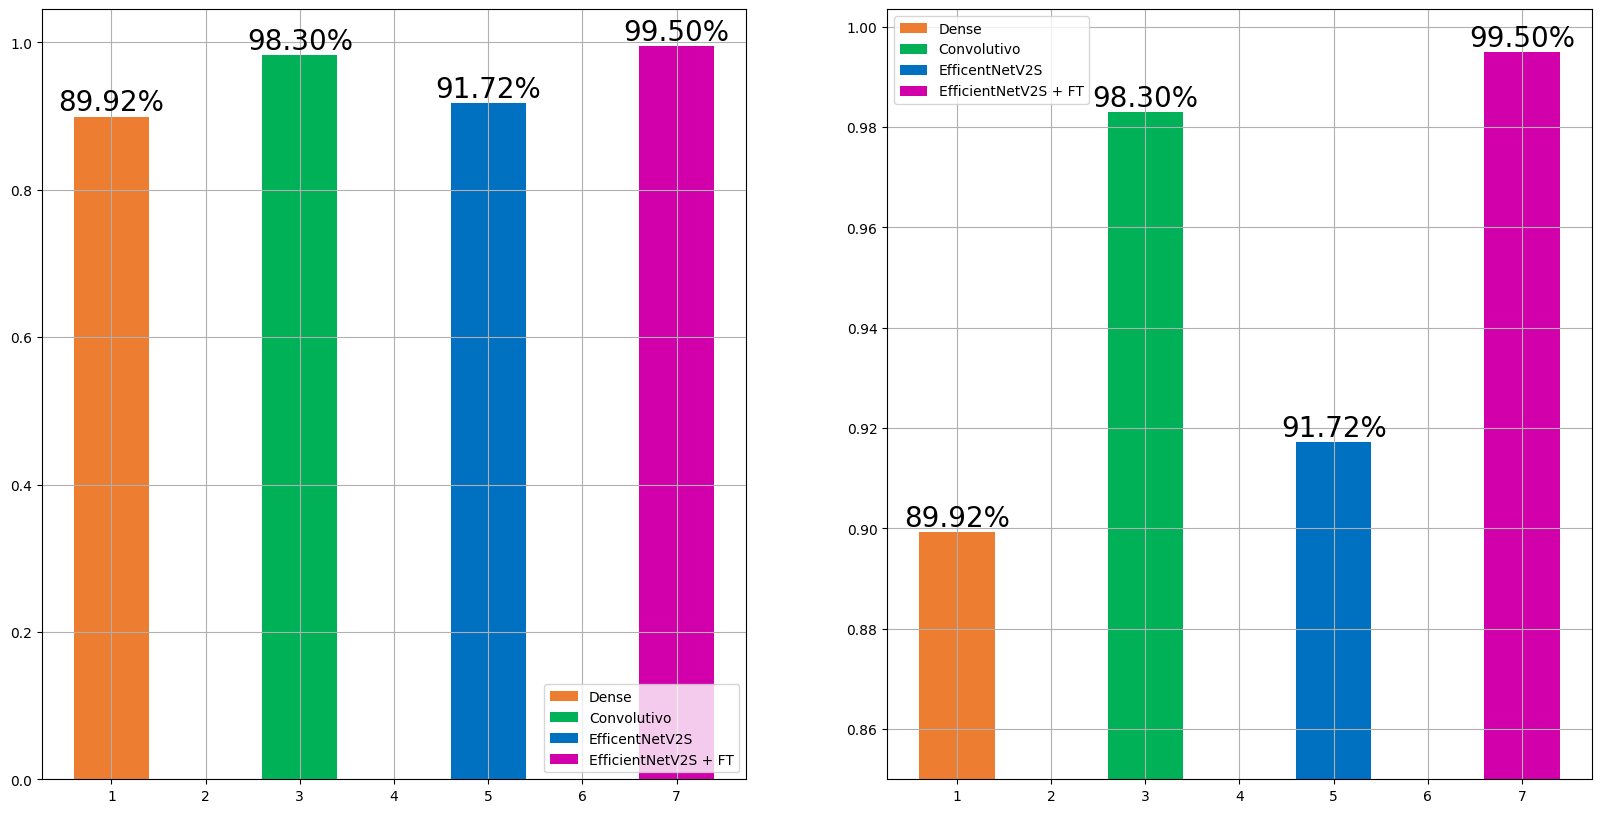

In [ ]:
#@title Indicare i percorsi dei salvataggi per stampare il grafico

percorsoDense = "" #@param {type:"string"}
percorsoConvolutivo = "" #@param {type:"string"}
percorsoEfficent = "" #@param {type:"string"}
percorsoEfficentFT = "" #@param {type:"string"}

Dense       = loadHistory(percorsoDense)
Convolutivo = loadHistory(percorsoConvolutivo)
Efficent    = loadHistory(percorsoEfficent)
EfficentFT  = loadHistory(percorsoEfficentFT)

plt.figure(figsize=(20, 10))

plt.subplot(1,2,1)
plt.bar(1, mediaF1Score(Dense), color='#ed7d31', label="Dense")
plt.text(1, mediaF1Score(Dense), f"{mediaF1Score(Dense)*100:.2f}%", ha='center', va='bottom', fontsize=20)
plt.bar(3, mediaF1Score(Convolutivo), color='#00b158', label="Convolutivo")
plt.text(3, mediaF1Score(Convolutivo), f"{mediaF1Score(Convolutivo)*100:.2f}%", ha='center', va='bottom', fontsize=20)
plt.bar(5, mediaF1Score(Efficent), color='#0070c0', label="EfficentNetV2S")
plt.text(5, mediaF1Score(Efficent), f"{mediaF1Score(Efficent)*100:.2f}%", ha='center', va='bottom', fontsize=20)
plt.bar(7, mediaF1Score(EfficentFT), color='#d100aa', label="EfficientNetV2S + FT")
plt.text(7, mediaF1Score(EfficentFT), f"{mediaF1Score(EfficentFT)*100:.2f}%", ha='center', va='bottom', fontsize=20)
plt.ylim([0, 1.045])

plt.grid()
plt.legend(loc="lower right")

plt.subplot(1,2,2)
plt.bar(1, mediaF1Score(Dense), color='#ed7d31', label="Dense")
plt.text(1, mediaF1Score(Dense), f"{mediaF1Score(Dense)*100:.2f}%", ha='center', va='bottom', fontsize=20)
plt.bar(3, mediaF1Score(Convolutivo), color='#00b158', label="Convolutivo")
plt.text(3, mediaF1Score(Convolutivo), f"{mediaF1Score(Convolutivo)*100:.2f}%", ha='center', va='bottom', fontsize=20)
plt.bar(5, mediaF1Score(Efficent), color='#0070c0', label="EfficentNetV2S")
plt.text(5, mediaF1Score(Efficent), f"{mediaF1Score(Efficent)*100:.2f}%", ha='center', va='bottom', fontsize=20)
plt.bar(7, mediaF1Score(EfficentFT), color='#d100aa', label="EfficientNetV2S + FT")
plt.text(7, mediaF1Score(EfficentFT), f"{mediaF1Score(EfficentFT)*100:.2f}%", ha='center', va='bottom', fontsize=20)
plt.ylim([0.85, 1.0035])

plt.grid()
plt.legend(loc="upper left")

plt.show()